## Mathematics and SymPy support

And we also support the display of mathematical expressions typeset in LaTeX, which is rendered
in the browser thanks to the [MathJax library](http://mathjax.org).  

Note that this is *different* from the above examples.  Above we were typing mathematical expressions
in Markdown cells (along with normal text) and letting the browser render them; now we are displaying
the output of a Python computation as a LaTeX expression wrapped by the `Math()` object so the browser
renders it.  The `Math` object will add the needed LaTeX delimiters (`$$`) if they are not provided:

In [1]:
from IPython.display import Math
Math(r'F(k) = \int_{-\infty}^{\infty} f(x) e^{2\pi i k} dx')

<IPython.core.display.Math object>

With the `Latex` class, you have to include the delimiters yourself.  This allows you to use other LaTeX modes such as `eqnarray`:

In [2]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

Using these tools, we can integrate with the [SymPy](http://sympy.org) package to perform symbolic manipulations,
and combined with numpy and matplotlib, also displays numerical visualizations of symbolically
constructed expressions.

We first load sympy printing and plotting support, as well as all of sympy:

In [3]:
%load_ext sympyprinting
%pylab inline

from __future__ import division
import sympy as sym
from sympy import *
x, y, z = symbols("x y z")
k, m, n = symbols("k m n", integer=True)
f, g, h = map(Function, 'fgh')

/home/dominik/anaconda3/lib/python3.6/site-packages/IPython/extensions/sympyprinting.py:31: UserWarning: The sympyprinting extension has moved to `sympy`, use `from sympy import init_printing; init_printing()`
  warnings.warn("The sympyprinting extension has moved to `sympy`, "


Populating the interactive namespace from numpy and matplotlib


In [17]:
from sympy import init_printing; init_printing()

<h2>Elementary operations</h2>

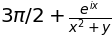

In [5]:
Rational(3,2)*pi + exp(I*x) / (x**2 + y)

In [6]:
exp(I*x).subs(x,pi).evalf()

In [7]:
exp(pi * sqrt(163)).evalf(50)

<h2>Algebra<h2>

In [8]:
eq = ((x+y)**2 * (x+1))
eq

In [9]:
expand(eq)

In [10]:
a = 1/x + (x*sin(x) - 1)/x
a

In [11]:
simplify(a)

<h2>Calculus</h2>

In [12]:
limit((sin(x)-x)/x**3, x, 0)

In [13]:
(1/cos(x)).series(x, 0, 6)

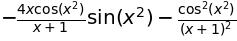

In [14]:
diff(cos(x**2)**2 / (1+x), x)

In [15]:
integrate(x**2 * cos(x), (x, 0, pi/2))

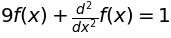

In [16]:
eqn = Eq(Derivative(f(x),x,x) + 9*f(x), 1)
display(eqn)
dsolve(eqn, f(x))